In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw = requests.get("https://services.arcgis.com/5T5nSi527N4F7luB/arcgis/rest/services/COVID_19_HistoricCasesByCountry(pt)View/FeatureServer/0/query?f=json&where=1%3D1&returnGeometry=false&spatialRel=esriSpatialRelIntersects&outFields=OBJECTID%2Ccum_conf%2CDateOfDataEntry%2CADM0_NAME&orderByFields=DateOfDataEntry%20asc&resultOffset=0&resultRecordCount=2000&cacheHint=true")

In [3]:
raw.json()['features'][:3]

[{'attributes': {'OBJECTID': 852,
   'cum_conf': 1,
   'DateOfDataEntry': 1579651200000,
   'ADM0_NAME': 'JAPAN'}},
 {'attributes': {'OBJECTID': 1282,
   'cum_conf': 1,
   'DateOfDataEntry': 1579651200000,
   'ADM0_NAME': 'REPUBLIC OF KOREA'}},
 {'attributes': {'OBJECTID': 1630,
   'cum_conf': 4,
   'DateOfDataEntry': 1579651200000,
   'ADM0_NAME': 'THAILAND'}}]

In [4]:
data = pd.io.json.json_normalize(raw.json(), record_path='features')
data = data.rename(columns={'attributes.OBJECTID':'id', 'attributes.ADM0_NAME': 'country',
                            'attributes.cum_conf':'cumsum', 'attributes.DateOfDataEntry':'unixtime'})
data['date'] = pd.to_datetime(data['unixtime'], origin='unix', unit='ms')
data

,id,cumsum,unixtime,country,date
0,852,1,1579651200000,JAPAN,2020-01-22
1,1282,1,1579651200000,REPUBLIC OF KOREA,2020-01-22
2,1630,4,1579651200000,THAILAND,2020-01-22
3,1781,1,1579651200000,UNITED STATES OF AMERICA,2020-01-22
4,324,574,1579737600000,CHINA,2020-01-23
5,853,1,1579737600000,JAPAN,2020-01-23
6,1283,1,1579737600000,REPUBLIC OF KOREA,2020-01-23
7,1631,4,1579737600000,THAILAND,2020-01-23
8,1782,1,1579737600000,UNITED STATES OF AMERICA,2020-01-23
9,325,835,1579824000000,CHINA,2020-01-24


In [5]:
cross = data.pivot_table(index='date', columns='country', values='cumsum')
cross.sample(5)

country,AFGHANISTAN,ALBANIA,ALGERIA,ANDORRA,ARGENTINA,ARMENIA,AUSTRALIA,AUSTRIA,AZERBAIJAN,BAHRAIN,...,Saint Martin,THAILAND,TOGO,TUNISIA,UKRAINE,UNITED ARAB EMIRATES,UNITED KINGDOM,UNITED STATES OF AMERICA,VIET NAM,occupied Palestinian territory
date,,,,,,,,,,,,,,,,,,,,,
2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN
2020-02-22,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,...,NaN,35.0,NaN,NaN,NaN,13.0,9.0,35.0,16.0,NaN
2020-02-05,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,...,NaN,25.0,NaN,NaN,NaN,5.0,2.0,11.0,10.0,NaN
2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,...,NaN,34.0,NaN,NaN,NaN,8.0,9.0,15.0,16.0,NaN
2020-03-09,4.0,2.0,20.0,1.0,12.0,1.0,77.0,112.0,9.0,95.0,...,NaN,50.0,1.0,2.0,1.0,45.0,277.0,213.0,30.0,19.0


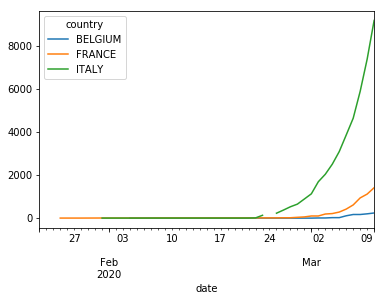

In [6]:
cross.loc[:,['BELGIUM', 'FRANCE', 'ITALY']].plot()

(0, 400)

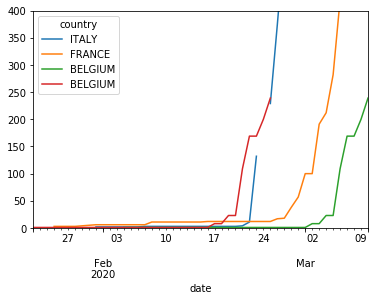

In [7]:
fig, axe = plt.subplots()
cross[['ITALY', 'FRANCE']].plot(ax=axe)
cross[['BELGIUM']].shift(0).plot(ax=axe)
cross[['BELGIUM']].shift(-14).plot(ax=axe)
axe.set_ylim([0,400])

In [8]:
cross.to_csv('covid19_{:%Y%m%d}.csv'.format(pd.Timestamp.now()))

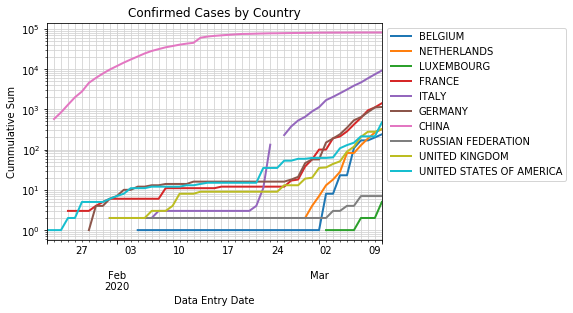

In [9]:
keys = ['BELGIUM', 'NETHERLANDS', 'LUXEMBOURG', 'FRANCE', 'ITALY', 'GERMANY', 'CHINA', 'RUSSIAN FEDERATION', 'UNITED KINGDOM', 'UNITED STATES OF AMERICA']
axe = cross[keys].plot(logy=True, linewidth=2)
axe.set_title("Confirmed Cases by Country")
axe.set_xlabel("Data Entry Date")
axe.set_ylabel("Cummulative Sum")
axe.grid(which='both', color='lightgray')
axe.legend(bbox_to_anchor=(1,1), loc='upper left')

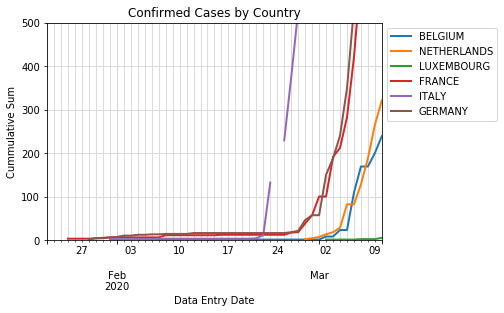

In [10]:
keys = ['BELGIUM', 'NETHERLANDS', 'LUXEMBOURG', 'FRANCE', 'ITALY', 'GERMANY']
axe = cross[keys].plot(linewidth=2)
axe.set_title("Confirmed Cases by Country")
axe.set_xlabel("Data Entry Date")
axe.set_ylabel("Cummulative Sum")
axe.grid(which='both', color='lightgray')
axe.set_ylim([0,500])
axe.legend(bbox_to_anchor=(1,1), loc='upper left')

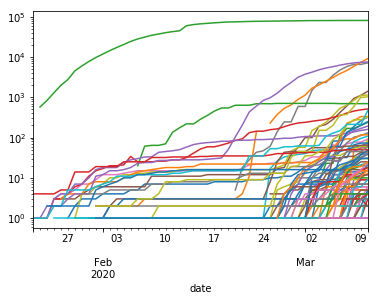

In [11]:
axe = cross.plot(logy=True)
axe.legend().remove()